17001222 — Marian Vela

# 0. Preparación del Ambiente

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn import model_selection, metrics, linear_model
from sklearn.linear_model import LinearRegression

In [2]:
# google drive conn
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Carga del Dataset

In [3]:
# file path in drive
drive = '/content/drive/My Drive/— Data Science/1 Data Science con Python/'

In [4]:
# load files
data = np.load(drive + 'proyecto_training_data.npy')

## Exploración de la data

In [5]:
# convert from array to dataframe for initial data exploration
df_data = pd.DataFrame(data)

In [6]:
df_data.shape

(1460, 6)

In [7]:
df_data.head()

,0,1,2,3,4,5
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


In [8]:
# original data doesn't have column names so we add the names according to the txt documentation
column_names = ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage']
df_data.columns = column_names

In [9]:
df_data.dtypes

SalePrice       float64
OverallQual     float64
1stFlrSF        float64
TotRmsAbvGrd    float64
YearBuilt       float64
LotFrontage     float64
dtype: object

In [10]:
# all the columns were read as float, but they're int
# adjust data type from float to int
float_to_int_cols = ['OverallQual', 'TotRmsAbvGrd', 'YearBuilt']
df_data[float_to_int_cols] = df_data[float_to_int_cols].astype(int)

## Exploración estadística

In [11]:
# statistical summary
df_data.describe()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


In [12]:
# create a df with the values obtained before
df_exploratory_summary = df_data.describe()

# add new row called range
df_exploratory_summary.loc['range'] = df_data.max() - df_data.min()

# output result
df_exploratory_summary

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000
range,720100.000000,9.000000,4358.000000,12.000000,138.000000,292.000000


In [13]:
'''
we use the nan ufuncs because LotFrontage has some nan values
np.ptp can't handle nan values so for range we manually calculate nanmax - nanmin

'''

# obtain statistical summary over the numpy array using ufuncs
print("Media: ", np.nanmean(data, axis = 0))
print("Mediana: ", np.nanmedian(data, axis = 0))
print("Valor máximo: ", np.nanmax(data, axis = 0))
print("Valor mínimo: ", np.nanmin(data, axis = 0))
print("Rango: ", np.nanmax(data, axis = 0) - np.nanmin(data, axis = 0))
print("Desviación estándar: ", np.nanstd(data, axis = 0))

Media:  [1.80921196e+05 6.09931507e+00 1.16262671e+03 6.51780822e+00
 1.97126781e+03 7.00499584e+01]
Mediana:  [1.630e+05 6.000e+00 1.087e+03 6.000e+00 1.973e+03 6.900e+01]
Valor máximo:  [7.550e+05 1.000e+01 4.692e+03 1.400e+01 2.010e+03 3.130e+02]
Valor mínimo:  [3.490e+04 1.000e+00 3.340e+02 2.000e+00 1.872e+03 2.100e+01]
Rango:  [7.201e+05 9.000e+00 4.358e+03 1.200e+01 1.380e+02 2.920e+02]
Desviación estándar:  [7.94152919e+04 1.38252284e+00 3.86455322e+02 1.62483655e+00
 3.01925588e+01 2.42746394e+01]


In [36]:
# count null values per column
na_count = df_data.isna().sum()

print("Valores nulos:\n", na_count)

Valores nulos:
 SalePrice         0
OverallQual       0
1stFlrSF          0
TotRmsAbvGrd      0
YearBuilt         0
LotFrontage     259
dtype: int64


# 3. Train Test Split

In [14]:
# inspect total row number
data.shape

(1460, 6)

In [15]:
# extract the number of observations to a variable
n_rows = data.shape[0]

In [16]:
# split into train 80% & test 20%

train_pct = 0.8
train_size = int(train_pct * n_rows)

# slicing dataset
train_data = data[:train_size]
test_data = data[train_size:]

In [17]:
# verify if split was successful
print(train_data.shape)
print(test_data.shape)

(1168, 6)
(292, 6)


# 4. Histogramas

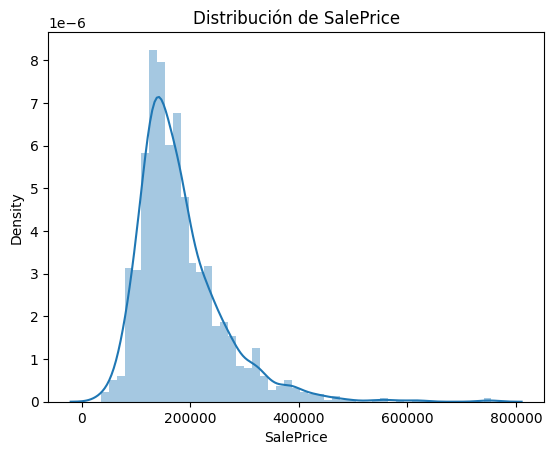

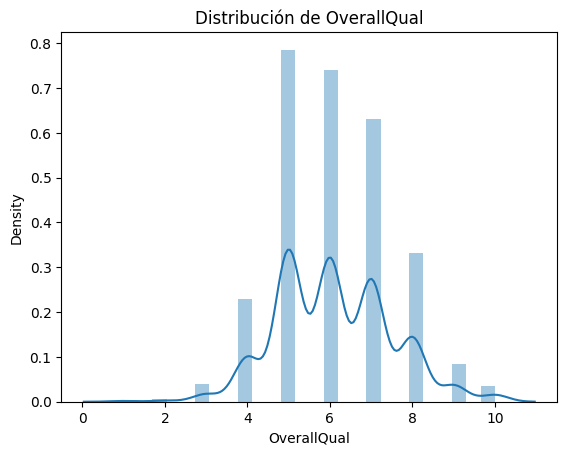

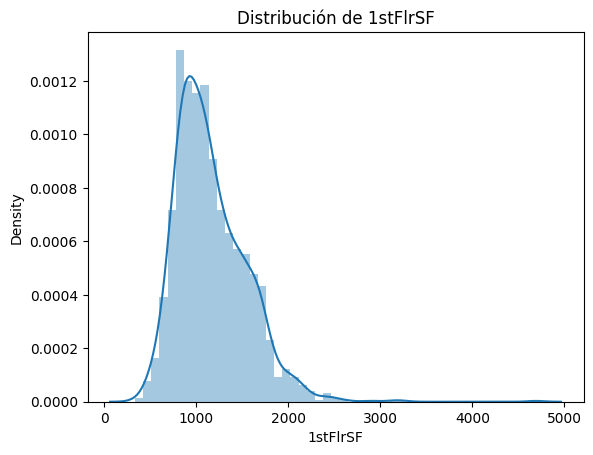

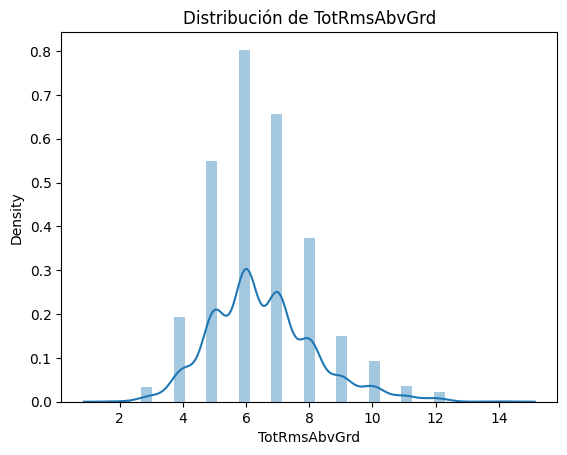

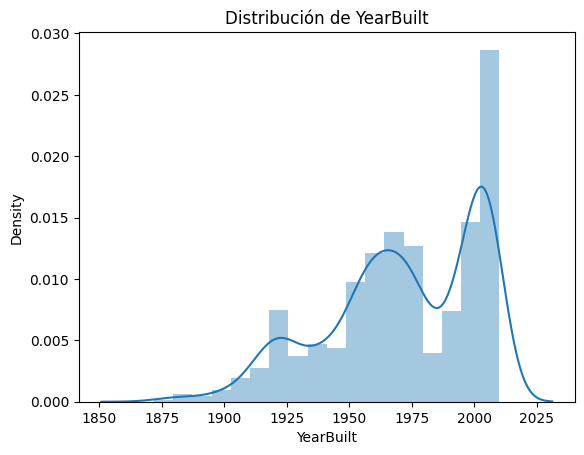

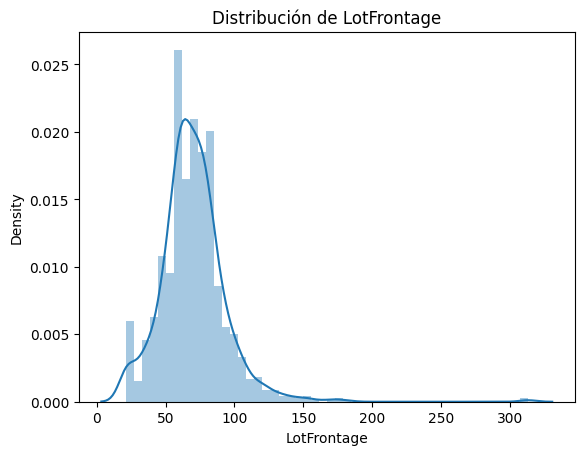

In [91]:
# plot histogram per variable
for column in df_data:
  sns.distplot(df_data[column].dropna())
  plt.title(f"Distribución de {column}")
  plt.show()

# 5. Correlación

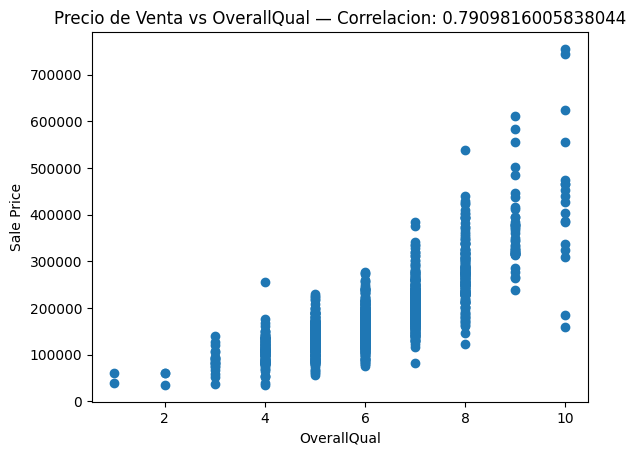

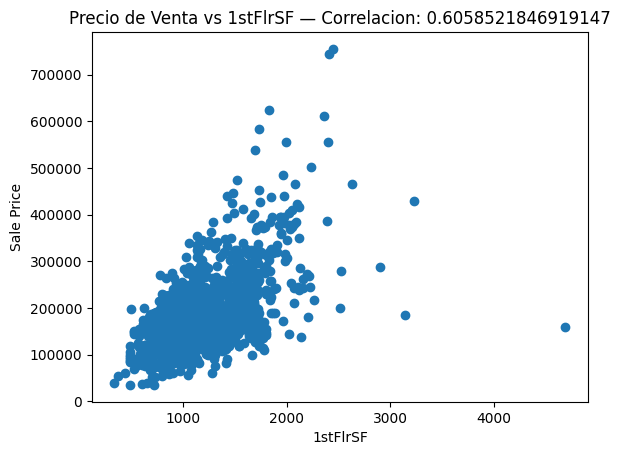

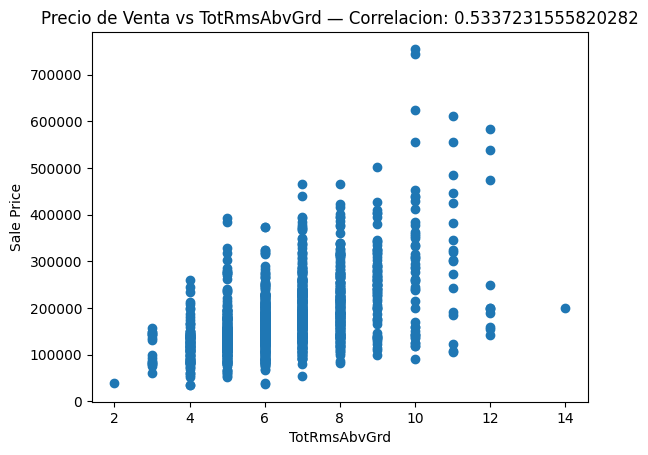

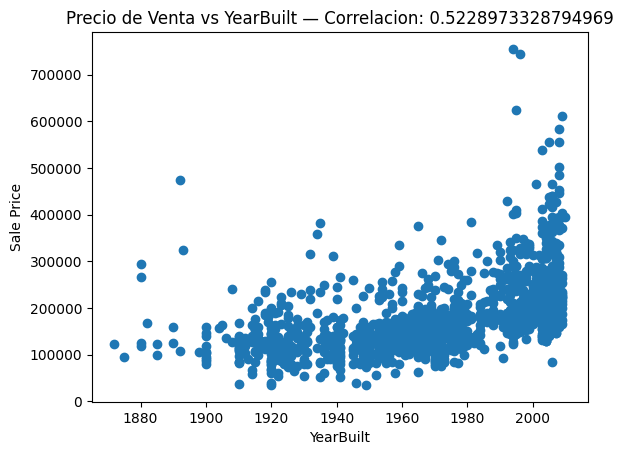

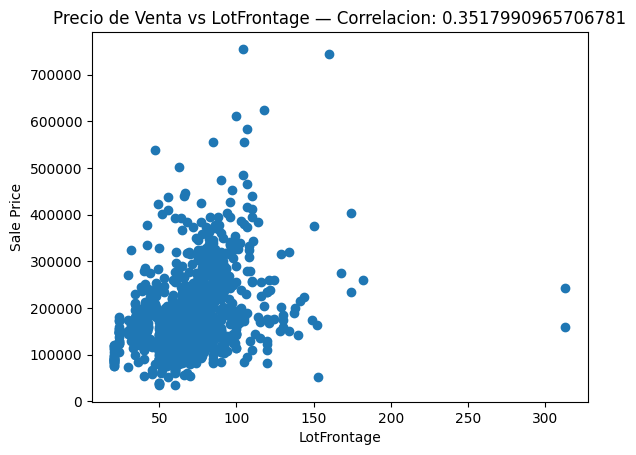

In [19]:
# calculate correlation coefficient and plot scatterplot
# note: we exclude SalePrice from the analysis because that's what we're trying to predict
for column in df_data.columns[1:]:
  correlation = df_data.SalePrice.corr(df_data[column])
  plt.scatter(df_data[column], df_data.SalePrice)
  plt.title(f"Precio de Venta vs {column} — Correlacion: {correlation}")
  plt.xlabel(column)
  plt.ylabel('Sale Price')
  plt.show()

## Top variables con correlacion

In [20]:
'''
calculate the correlation matrix (all of it) but we extract only the corr values with SalePrice
we exlude SalePrice from our analysis because correlation with the same variable is 1
'''

# determine correlation matrix
corr_mat = df_data.corr()
corr_mat

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
SalePrice,1.000000,0.790982,0.605852,0.533723,0.522897,0.351799
OverallQual,0.790982,1.000000,0.476224,0.427452,0.572323,0.251646
1stFlrSF,0.605852,0.476224,1.000000,0.409516,0.281986,0.457181
TotRmsAbvGrd,0.533723,0.427452,0.409516,1.000000,0.095589,0.352096
YearBuilt,0.522897,0.572323,0.281986,0.095589,1.000000,0.123349
LotFrontage,0.351799,0.251646,0.457181,0.352096,0.123349,1.000000


In [21]:
# from corr mat extract top row and then eliminate the 1st value which is saleprice vs saleprice
correlations = corr_mat['SalePrice']
correlations = correlations.drop(index = 'SalePrice')
correlations

OverallQual     0.790982
1stFlrSF        0.605852
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
LotFrontage     0.351799
Name: SalePrice, dtype: float64

In [22]:
# sort and print top 2
sort_corr = correlations.sort_values(ascending = False)
print(f"Las variables con mayor correlación son: {sort_corr.index[0]}: {sort_corr[0]}  y {sort_corr.index[1]}: {sort_corr[1]}")

Las variables con mayor correlación son: OverallQual: 0.7909816005838053  y 1stFlrSF: 0.6058521846919153


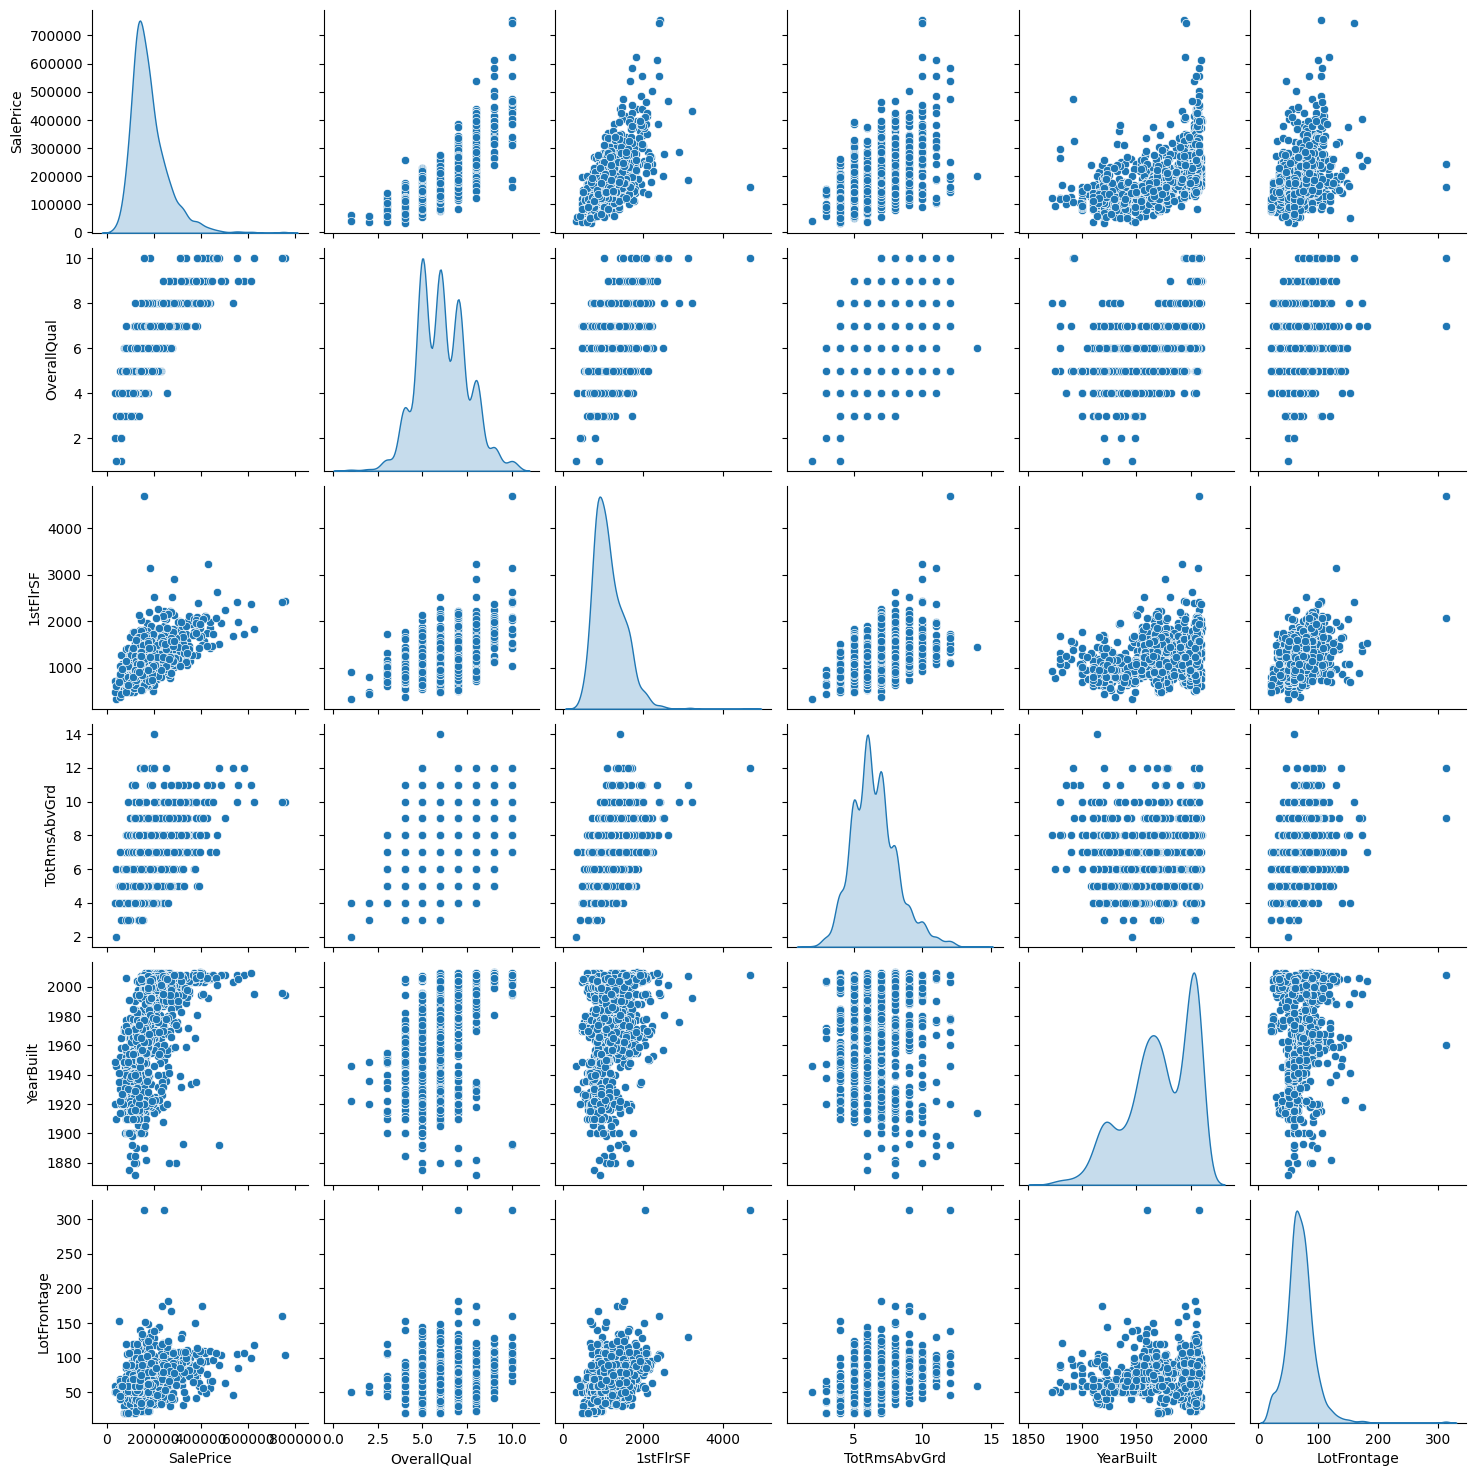

In [23]:
# visually represent the correlation using seaborn
sns.pairplot(df_data, diag_kind = "kde")

# 6. Funcion Modelo Regresion Lineal

In [ ]:
'''
3 funciones en total:

func(vector var_x, vector var_y, int epochs, int imprimir_error_cada = 10, float alpha)

  dejamos el default de imprimir error en 10
  alpha = learning rate

  1. mat = var_x, var_y
  2. b0 = 0, b1 = 0
  3. for each epoch do:
        y hat = b1 * x + b0 (usando np.dot)
        error = 1 / 2n * sum ( (y - y hat)**2 )
        gradient b0
        gradient b1

        ressults: <iteration: results: {} >
  4. return model_results, error

func(vector error)

  1. crear la grafica con var_x = iteracion, var_y = error
  2. what else does tensorboard generate ?

func(model_results, int iteration_step)

  iteration_step es cada cuantas iteraciones se grafican (si n = 3, 3 6 9 12 15...)

'''

In [48]:
# class that defines custom model made from scratch

class RegressionModel:

  # method for creating an object, we initialize betas to 0
  def __init__(self):
    self.beta = np.random.rand(2)   # vector for beta values
    self.results = []         # vector with results
    self.errors = []          # vector with errors

  # method to add a column of ones so that we can use vector operations
  def add_ones(self, var_x):
    return np.column_stack([np.ones(var_x.shape[0]), var_x])

  # method to train the model, some parameters are set to default values
  def train(self, var_x, var_y, epochs=50, print_error_every=10, learning_rate=0.01):
    x_vector = self.add_ones(var_x)
    y_vector = var_y

    for epoch in range(1, epochs + 1):
      # prediccion
      y_hat = x_vector.dot(self.beta)

      # error / cost
      error = (1 / (2 * len(y_vector))) * np.sum( (y_vector - y_hat) ** 2)

      # gradient
      gradient = (1 / len(y_vector)) * x_vector.T.dot(y_hat - y_vector)

      # update parameters using gradient and learning rate
      self.beta -= learning_rate * gradient

      # append epoch number, errors and results to vectors
      self.errors.append((epoch, error))
      self.results.append((epoch, self.beta[0], self.beta[1], gradient[0], gradient[1]))
      if epoch % print_error_every == 0:
        print(f'Epoch {epoch}, Error {error}')

  # method for prediction
  def predict(self, X):
    X = self.add_ones(X)
    return X.dot(self.beta)

In [82]:
# class that generates graphs
class ModelGraphs:

    def plot_errors(errors):
        epochs, error_values = zip(*errors)
        plt.figure(figsize=(10, 6))
        plt.plot(epochs, error_values, label='error')
        plt.xlabel('Epoch')
        plt.ylabel('Error')
        plt.title('Error de Modelo')
        plt.legend()
        plt.show()


    def plot_results(X, y_actual, model_results, iteration_step, title):
      plt.figure(figsize=(10, 6))
      plt.scatter(X, y_actual, color='blue', label='Actual')

      # _, _ represent the gradient values which we do not plot
      for i, (epoch, beta_0, beta_1, _, _) in enumerate(model_results):
        if i % iteration_step == 0:
          y_pred = beta_0 + beta_1 * X
          plt.plot(X, y_pred, label=f'Epoch {epoch}', linewidth=2, alpha=0.5)

      plt.xlabel('Variable independiente')
      plt.ylabel('Variable dependiente')
      plt.title(title)
      plt.legend()
      plt.show()

# 7. Regresion con Sci Kit Learn

In [51]:
# class that defines sklearn model

class SklearnModel:
    def __init__(self):
        self.model = LinearRegression()

    def train(self, var_x, var_y):
        self.model.fit(var_x.reshape(-1, 1), var_y)

    def predict(self, var_x):
        return self.model.predict(var_x.reshape(-1, 1))

# 8. Funcion de Error

In [63]:
# define RMSE funcion

def calculate_rmse(y_actual, y_predicted):
    error_squared = (y_actual - y_predicted) ** 2
    mse = np.mean(error_squared)
    rmse = np.sqrt(mse)
    return rmse

# RMSE / mean
def calculate_rmse_mean(y_actual, y_predicted):
  error_squared = (y_actual - y_predicted) ** 2
  mse = np.mean(error_squared)
  rmse = np.sqrt(mse)
  mean_actual = np.mean(y_actual)
  rmse_div_mean = (rmse / mean_actual)
  return rmse_div_mean

# 8. Predicciones de Modelos

In [66]:
# split train test datasets by type of variable (dependent, independent)
X_train = train_data[:, 1:]
X_test = test_data[:, 1:]

y_train = train_data[:, 0]
y_test = test_data[:, 0]

# overall quality
X_train_quality = train_data[:, 1]
X_test_quality = test_data[:, 1]

# 1st Floor Square footage
X_train_1stFlr = train_data[:, 1]
X_test_1stFlr = test_data[:, 1]

## Modelos Overall Quality

In [69]:
# custom linear model overall quality
custom_model_quality = RegressionModel()
custom_model_quality.train(X_train_quality, y_train, epochs = 5000, learning_rate = 0.001, print_error_every=1000)
predictions_custom_quality = custom_model_quality.predict(X_test_quality)

# scikit learn model
sklearn_model_quality = SklearnModel()
sklearn_model_quality.train(X_train_quality, y_train)
predictions_sklearn_quality = sklearn_model_quality.predict(X_test_quality)

# RMSE for both models with Overall Quality
rmse_custom_quality = calculate_rmse(y_test, predictions_custom_quality)
rmse_sklearn_quality = calculate_rmse(y_test, predictions_sklearn_quality)

print(f"\nRMSE para modelo propio (OverallQual): {rmse_custom_quality}")
print(f"RMSE para modelo sklearn (OverallQual): {rmse_sklearn_quality}")

# RMSE / mean for both models with Overall Quality
rmse_mean_custom_quality = calculate_rmse_mean(y_test, predictions_custom_quality)
rmse_mean_sklearn_quality = calculate_rmse_mean(y_test, predictions_sklearn_quality)

print(f"\nRMSE/promedio para modelo propio (OverallQual): {rmse_mean_custom_quality}")
print(f"RMSE/promedio para modelo sklearn (OverallQual): {rmse_mean_sklearn_quality}")

Epoch 1000, Error 1372396842.755613
Epoch 2000, Error 1352024342.862465
Epoch 3000, Error 1333492527.7511263
Epoch 4000, Error 1316635088.8937418
Epoch 5000, Error 1301300743.9780838

RMSE para modelo propio (OverallQual): 54228.86546841054
RMSE para modelo sklearn (OverallQual): 51285.30597499287

RMSE/promedio para modelo propio (OverallQual): 0.2975604499000287
RMSE/promedio para modelo sklearn (OverallQual): 0.281408777177333


## Modelos 1st Floor Square Footage

In [85]:
# custom linear model 1st Florr SqFt
custom_model_1stFlr = RegressionModel()
custom_model_1stFlr.train(X_train_1stFlr, y_train, epochs = 5000, learning_rate = 0.005, print_error_every=1000)
predictions_custom_1stFlr = custom_model_1stFlr.predict(X_test_1stFlr)

# scikit learn model
sklearn_model_1stFlr = SklearnModel()
sklearn_model_1stFlr.train(X_train_1stFlr, y_train)
predictions_sklearn_1stFlr = sklearn_model_1stFlr.predict(X_test_1stFlr)

# RMSE for both models with 1st Florr SqFt
rmse_custom_1stFlr = calculate_rmse(y_test, predictions_custom_1stFlr)
rmse_sklearn_1stFlr = calculate_rmse(y_test, predictions_sklearn_1stFlr)

print(f"\nRMSE para modelo propio (1st Floor SqFt): {rmse_custom_1stFlr}")
print(f"RMSE para modelo sklearn (1st Floor SqFt): {rmse_sklearn_1stFlr}")

# RMSE / mean for both models with 1st Florr SqFt
rmse_mean_custom_1stFlr = calculate_rmse_mean(y_test, predictions_custom_1stFlr)
rmse_mean_sklearn_1stFlr = calculate_rmse_mean(y_test, predictions_sklearn_1stFlr)

print(f"\nRMSE/promedio para modelo propio (1st Floor SqFt): {rmse_mean_custom_1stFlr}")
print(f"RMSE/promedio para modelo sklearn (1st Floor SqFt): {rmse_mean_sklearn_1stFlr}")

Epoch 1000, Error 1301352010.7529588
Epoch 2000, Error 1243098850.8739333
Epoch 3000, Error 1206818775.1319802
Epoch 4000, Error 1184223539.1211727
Epoch 5000, Error 1170151223.120087

RMSE para modelo propio (1st Floor SqFt): 51716.22748788548
RMSE para modelo sklearn (1st Floor SqFt): 51285.30597499287

RMSE/promedio para modelo propio (1st Floor SqFt): 0.2837732964815884
RMSE/promedio para modelo sklearn (1st Floor SqFt): 0.281408777177333


# 9. Graficas de Modelos

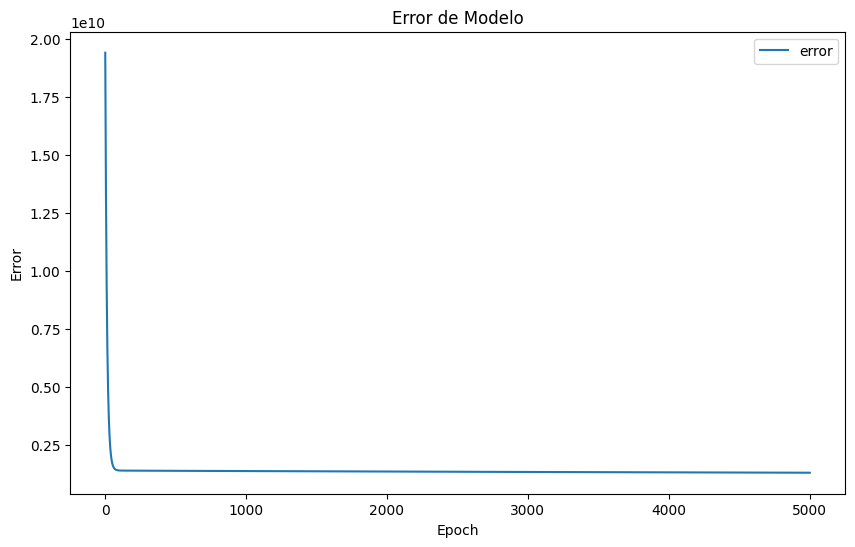

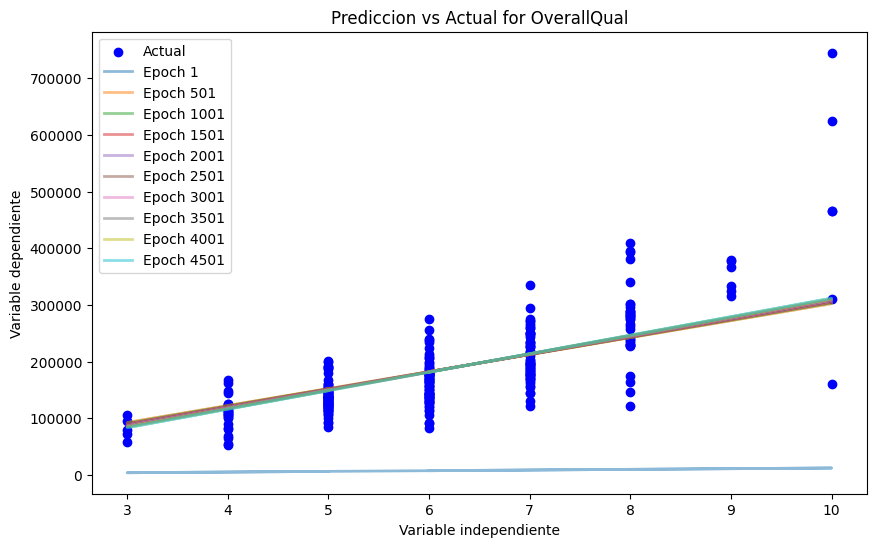

In [86]:
# plot errors for custom model trained on OverallQual
ModelGraphs.plot_errors(custom_model_quality.errors)

# plot results for custom model trained on OverallQual
ModelGraphs.plot_results(X_test_quality, y_test, custom_model_quality.results, iteration_step = 500, title = "Prediccion vs Actual for OverallQual")

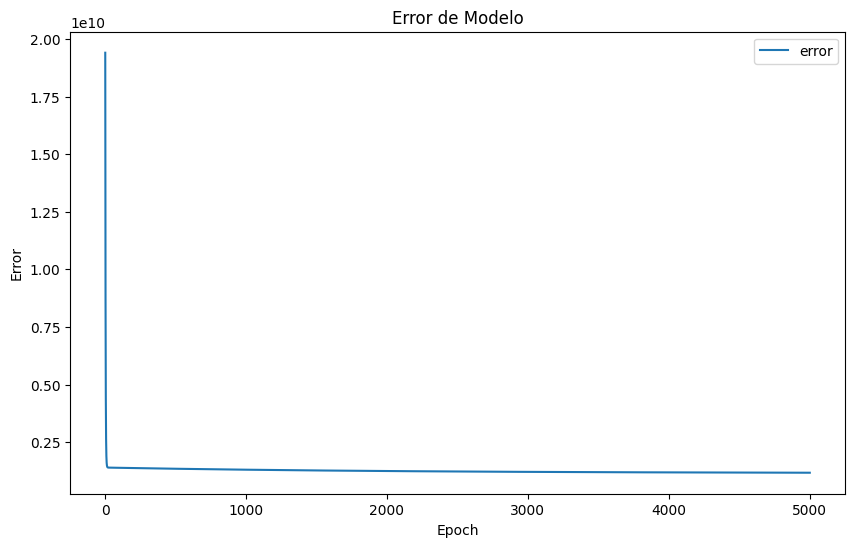

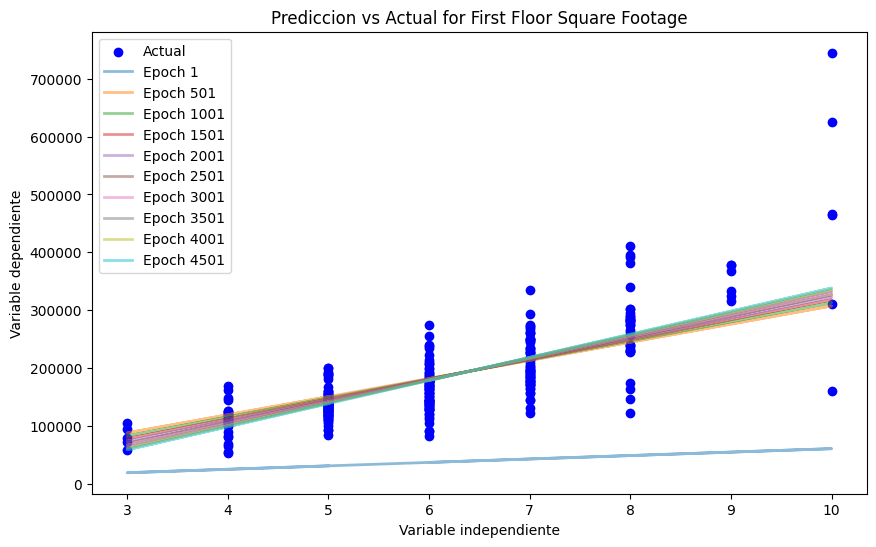

In [87]:
# plot errors for custom model trained on First Floor Square Footage
ModelGraphs.plot_errors(custom_model_1stFlr.errors)

# plot results for custom model trained on First Floor Square Footage
ModelGraphs.plot_results(X_test_1stFlr, y_test, custom_model_1stFlr.results, iteration_step = 500, title = "Prediccion vs Actual for First Floor Square Footage")

# 10. Referencias

OOP in Python
*   https://www.geeksforgeeks.org/python-classes-and-objects/
*   https://www.freecodecamp.org/news/object-oriented-programming-in-python/
*   https://www.freecodecamp.org/news/learn-object-oriented-programming-with-python/

Matplotlib Documentation
*   https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter

Sci Kit Learn Documentation
*   https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Numpy Documentation
*   https://numpy.org/doc/stable/reference/ufuncs.html
*   https://numpy.org/doc/stable/reference/generated/numpy.nanmax.html

Linear Regression
*   https://towardsdatascience.com/linear-regression-from-scratch-cd0dee067f72
*   https://machinelearningcompass.com/machine_learning_math/gradient_descent_for_linear_regression/
